<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/MulticlassClassificationVectorizedBackprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors
import seaborn as sns
import imageio 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder 
from sklearn.datasets import make_blobs 

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["Red","Yellow","Green"])
np.random.seed(0)
data ,labels = make_blobs(n_samples= 2000, n_features=2,centers=4,random_state=0)

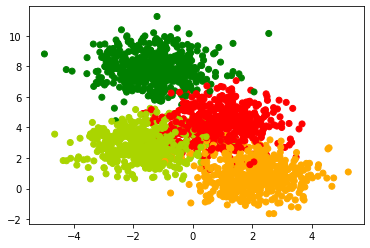

In [7]:
plt.scatter(data[:,0],data[:,1], c= labels, cmap = my_cmap)
plt.show()

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(data,labels,stratify=labels,random_state=0)
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)


In [0]:
class FfMultiClassVectorForm:

  def __init__(self, W1,W2):

    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))

  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))

  def softmax(self,x):
    exps = np.exp(x)
    return exps / np.sum(exps)
  
  def forwardPass(self,x):
    x = x.reshape(1,-1)  # dimesions (1,2)
    self.A1 = np.matmul(x,self.W1) + self.B1  # X(1,2) * W1(2,2) -> (1,2) + B(1,2 ) = (1 , 2) 
    self.H1 = self.sigmoid(self.A1) () # (1 , 2)
    self.A2 = np.matmul(self.H1,self.W2) + self.B2  # ( 1, 2) * ( 2, 4) - > (1 , 4 )
    self.H2 = self.softmax(self.A2) # ( 1 , 4 )
    return self.H2

  def grad_sigmoid(self, x ):
    return x * (1 - x)
  
  def grad(self,x):
    